# **Students Performance Dataset**

Made by Studens :



*  Ahmad Mohammad Alrabai

*  Abdelrahman  nader suleiman

*  Abdelrahman Ahmad Banat

*  ismail yaseen ismail kutkut






In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


**NumPy** Imports NumPy, the main library for numerical operations in Python (e.g. arrays, mathematical functions). The alias np is a shorthand commonly used in data science.

**plotly** is an interactive high level plotting library.

**Seaborn** is a powerful data visualization library in Python.
It is built on top of Matplotlib, but it is easier, cleaner, and produces more beautiful charts.


In [ ]:
pd.set_option("display.precision", 2)
student = pd.read_csv('Student_performance_data _ (1).csv')


In [ ]:
student.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.00,2392.00,2392.00,2392.00,2392.00,2.39e+03,2392.00,2392.00,2392.00,2392.00,2392.00,2392.0,2392.00,2392.00,2392.00
mean,2196.50,16.47,0.51,0.88,1.75,9.77e+00,14.54,0.30,2.12,0.38,0.30,0.2,0.16,1.91,2.98
std,690.66,1.12,0.50,1.03,1.00,5.65e+00,8.47,0.46,1.12,0.49,0.46,0.4,0.36,0.92,1.23
min,1001.00,15.00,0.00,0.00,0.00,1.06e-03,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,1598.75,15.00,0.00,0.00,1.00,5.04e+00,7.00,0.00,1.00,0.00,0.00,0.0,0.00,1.17,2.00
50%,2196.50,16.00,1.00,0.00,2.00,9.71e+00,15.00,0.00,2.00,0.00,0.00,0.0,0.00,1.89,4.00
75%,2794.25,17.00,1.00,2.00,2.00,1.44e+01,22.00,1.00,3.00,1.00,1.00,0.0,0.00,2.62,4.00
max,3392.00,18.00,1.00,3.00,4.00,2.00e+01,29.00,1.00,4.00,1.00,1.00,1.0,1.00,4.00,4.00


In [ ]:
# Remove the 'StudentID' and 'GradeClass' columns since they are not needed for analysis/modeling
student.drop(['StudentID','GradeClass'],axis=1,inplace=True)


In [ ]:
# Display the first five rows of the dataset after dropping unnecessary columns
student.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.83,7,1,2,0,0,1,0,2.93
1,18,0,0,1,15.41,0,0,1,0,0,0,0,3.04
2,15,0,2,3,4.21,26,0,2,0,0,0,0,0.11
3,17,1,0,3,10.03,14,0,3,1,0,0,0,2.05
4,17,1,0,2,4.67,17,1,3,0,0,0,0,1.29


In [ ]:
# Count the number of duplicate rows in the dataset
student.duplicated().sum()

np.int64(0)

**This code generates individual box plots for multiple student attributes such as age, gender, ethnicity, study time, absences, extracurricular activities, and GPA. Box plots are used to visualize the distribution of each variable, identify the median, interquartile range, and detect potential outliers. The plots help in understanding the variability and patterns within the student dataset.**

In [ ]:
fig_Age = px.box(student , x = 'Age')
fig_Gender = px.box(student , x = 'Gender')
fig_Ethnicity = px.box(student , x = 'Ethnicity')
fig_ParentalEducation = px.box(student , x = 'ParentalEducation')
fig_StudyTimeWeekly = px.box(student , x = 'StudyTimeWeekly')
fig_Absences = px.box(student , x = 'Absences')
fig_Tutoring = px.box(student , x = 'Tutoring')
fig_ParentalSupport = px.box(student , x = 'ParentalSupport')
fig_Extracurricular = px.box(student , x = 'Extracurricular')
fig_Sports = px.box(student , x = 'Sports')
fig_Music = px.box(student , x = 'Music')
fig_Volunteering = px.box(student , x = 'Volunteering')
fig_GPA = px.box(student , x = 'GPA')


fig_Age.show()
fig_Gender.show()
fig_Ethnicity.show()
fig_ParentalEducation.show()
fig_StudyTimeWeekly.show()
fig_Absences.show()
fig_Tutoring.show()
fig_ParentalSupport.show()
fig_Extracurricular.show()
fig_Sports.show()
fig_Music.show()
fig_Volunteering.show()
fig_GPA.show()

**Here, as it appears , there are outliers in the parentalEducation column.**

Solution:

This code computes the 25th percentile (Q1) and the 75th percentile (Q3) of the ParentalEducation variable. The interquartile range (IQR), calculated as the difference between Q3 and Q1, measures the variability of the data and helps identify potential outliers.

In [ ]:
# Outliers processing for ParentalEducation
q1_ParentalEduc = student['ParentalEducation'].quantile(0.25)
q3_ParentalEduc = student['ParentalEducation'].quantile(0.75)
iqr_ParentalEduc = q3_ParentalEduc - q1_ParentalEduc
q1_ParentalEduc , q3_ParentalEduc , iqr_ParentalEduc

(np.float64(1.0), np.float64(2.0), np.float64(1.0))

In [ ]:
# Calculate the UPPER & LOWER
upper_ParentalEduc = q3_ParentalEduc + (1.5 * iqr_ParentalEduc)
lower_ParentalEduc = q1_ParentalEduc - (1.5 * iqr_ParentalEduc)
upper_ParentalEduc , lower_ParentalEduc

(np.float64(3.5), np.float64(-0.5))

In [ ]:
# If the value is more than (3.5) or lower than (-0.5) then its an Outlier
outliers_ParentalEduc = student.loc[(student['ParentalEducation'] > upper_ParentalEduc) | (student['ParentalEducation'] < lower_ParentalEduc)]

In [ ]:
new_df =  student.loc[(student['ParentalEducation'] < upper_ParentalEduc) & (student['ParentalEducation'] > lower_ParentalEduc)]
print('before removing outliers:' , len(student))
print('after removing outliers:' , len(new_df))
print('outliers:' , len(student) - len(new_df))

before removing outliers: 2392
after removing outliers: 2272
outliers: 120


Text(0.5, 1.0, 'Boxplot of parentalEducation before removing outliers')

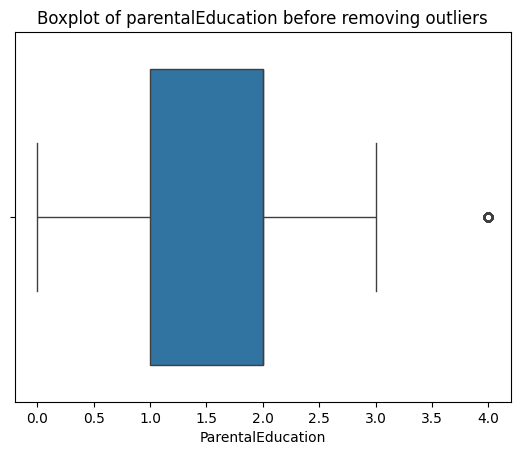

In [ ]:
sns.boxplot(student['ParentalEducation'] , orient='h')
plt.title('Boxplot of parentalEducation before removing outliers')

Text(0.5, 1.0, 'Boxplot of parentalEducation after removing outliers')

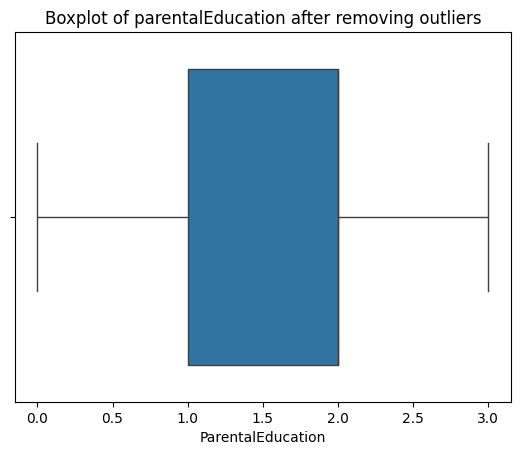

In [ ]:
sns.boxplot(new_df['ParentalEducation'] , orient='h')
plt.title('Boxplot of parentalEducation after removing outliers')

In [ ]:
new_df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
count,2272.00,2272.00,2272.00,2272.00,2.27e+03,2272.00,2272.00,2272.00,2272.00,2272.00,2272.00,2272.00,2272.00
mean,16.47,0.51,0.87,1.63,9.78e+00,14.48,0.30,2.13,0.39,0.30,0.19,0.16,1.91
std,1.12,0.50,1.02,0.88,5.64e+00,8.51,0.46,1.12,0.49,0.46,0.39,0.36,0.92
min,15.00,0.00,0.00,0.00,1.06e-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.00,0.00,0.00,1.00,5.04e+00,7.00,0.00,1.00,0.00,0.00,0.00,0.00,1.17
50%,16.00,1.00,0.00,2.00,9.73e+00,14.00,0.00,2.00,0.00,0.00,0.00,0.00,1.90
75%,17.00,1.00,2.00,2.00,1.44e+01,22.00,1.00,3.00,1.00,1.00,0.00,0.00,2.63
max,18.00,1.00,3.00,3.00,2.00e+01,29.00,1.00,4.00,1.00,1.00,1.00,1.00,4.00


In [ ]:
check_categoricals = new_df
for i in check_categoricals:
    print(f'the number of unique values in {i} is {new_df[i].nunique()}')

the number of unique values in Age is 4
the number of unique values in Gender is 2
the number of unique values in Ethnicity is 4
the number of unique values in ParentalEducation is 4
the number of unique values in StudyTimeWeekly is 2272
the number of unique values in Absences is 30
the number of unique values in Tutoring is 2
the number of unique values in ParentalSupport is 5
the number of unique values in Extracurricular is 2
the number of unique values in Sports is 2
the number of unique values in Music is 2
the number of unique values in Volunteering is 2
the number of unique values in GPA is 2252


seems like all the data is categorical except:

**StudyTimeWeekly**

**Absences**

so we gonna drop them from the check_categoricals

In [ ]:
check_categoricals = check_categoricals.drop(['StudyTimeWeekly','Absences'],axis=1)
check_categoricals.head()

,Age,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,1,2,0,0,1,0,2.93
1,18,0,0,1,0,1,0,0,0,0,3.04
2,15,0,2,3,0,2,0,0,0,0,0.11
3,17,1,0,3,0,3,1,0,0,0,2.05
4,17,1,0,2,1,3,0,0,0,0,1.29


In [ ]:
# To visualize the distribution of the data Lets return the data to its origins

check_categoricals['Gender'] = check_categoricals['Gender'].replace({0:'Male',1:'Female'})
check_categoricals['Ethnicity'] = check_categoricals['Ethnicity'].replace({0:'Caucasian', 1:'African American', 2:'Asian', 3:'Other'})
check_categoricals['ParentalEducation'] = check_categoricals['ParentalEducation'].replace({0:'None', 1:'High School', 2:'College', 3:'Bachelor\'s', 4:'Higher'})
check_categoricals['Tutoring'] = check_categoricals['Tutoring'].replace({0:'No',1:'Yes'})
check_categoricals['ParentalSupport'] = check_categoricals['ParentalSupport'].replace({0:'None', 1:'Low', 2:'Moderate', 3:'High', 4:'Very High'})
check_categoricals['Extracurricular'] = check_categoricals['Extracurricular'].replace({0:'No',1:'Yes'})
check_categoricals['Sports'] = check_categoricals['Sports'].replace({0:'No',1:'Yes'})
check_categoricals['Music'] = check_categoricals['Music'].replace({0:'No',1:'Yes'})
check_categoricals['Volunteering'] = check_categoricals['Volunteering'].replace({0:'No',1:'Yes'})

check_categoricals.head()

,Age,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,Female,Caucasian,College,Yes,Moderate,No,No,Yes,No,2.93
1,18,Male,Caucasian,High School,No,Low,No,No,No,No,3.04
2,15,Male,Asian,Bachelor's,No,Moderate,No,No,No,No,0.11
3,17,Female,Caucasian,Bachelor's,No,High,Yes,No,No,No,2.05
4,17,Female,Caucasian,College,Yes,High,No,No,No,No,1.29


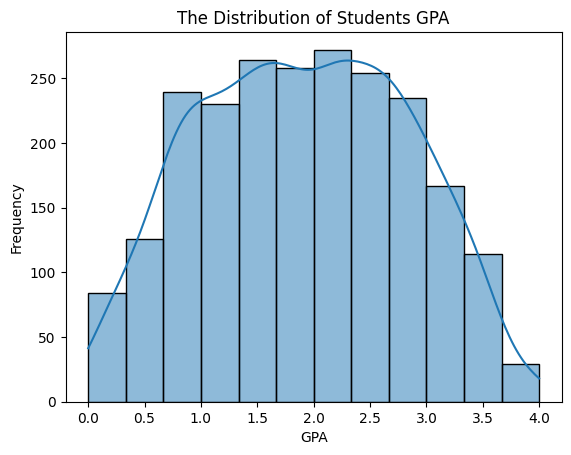

In [ ]:

sns.histplot(x='GPA', data=new_df, kde=True, bins=12)
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('The Distribution of Students GPA')
plt.show()

# **Visualizations**

/tmp/ipython-input-3061611534.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3061611534.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3061611534.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3061611534.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3061611534.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

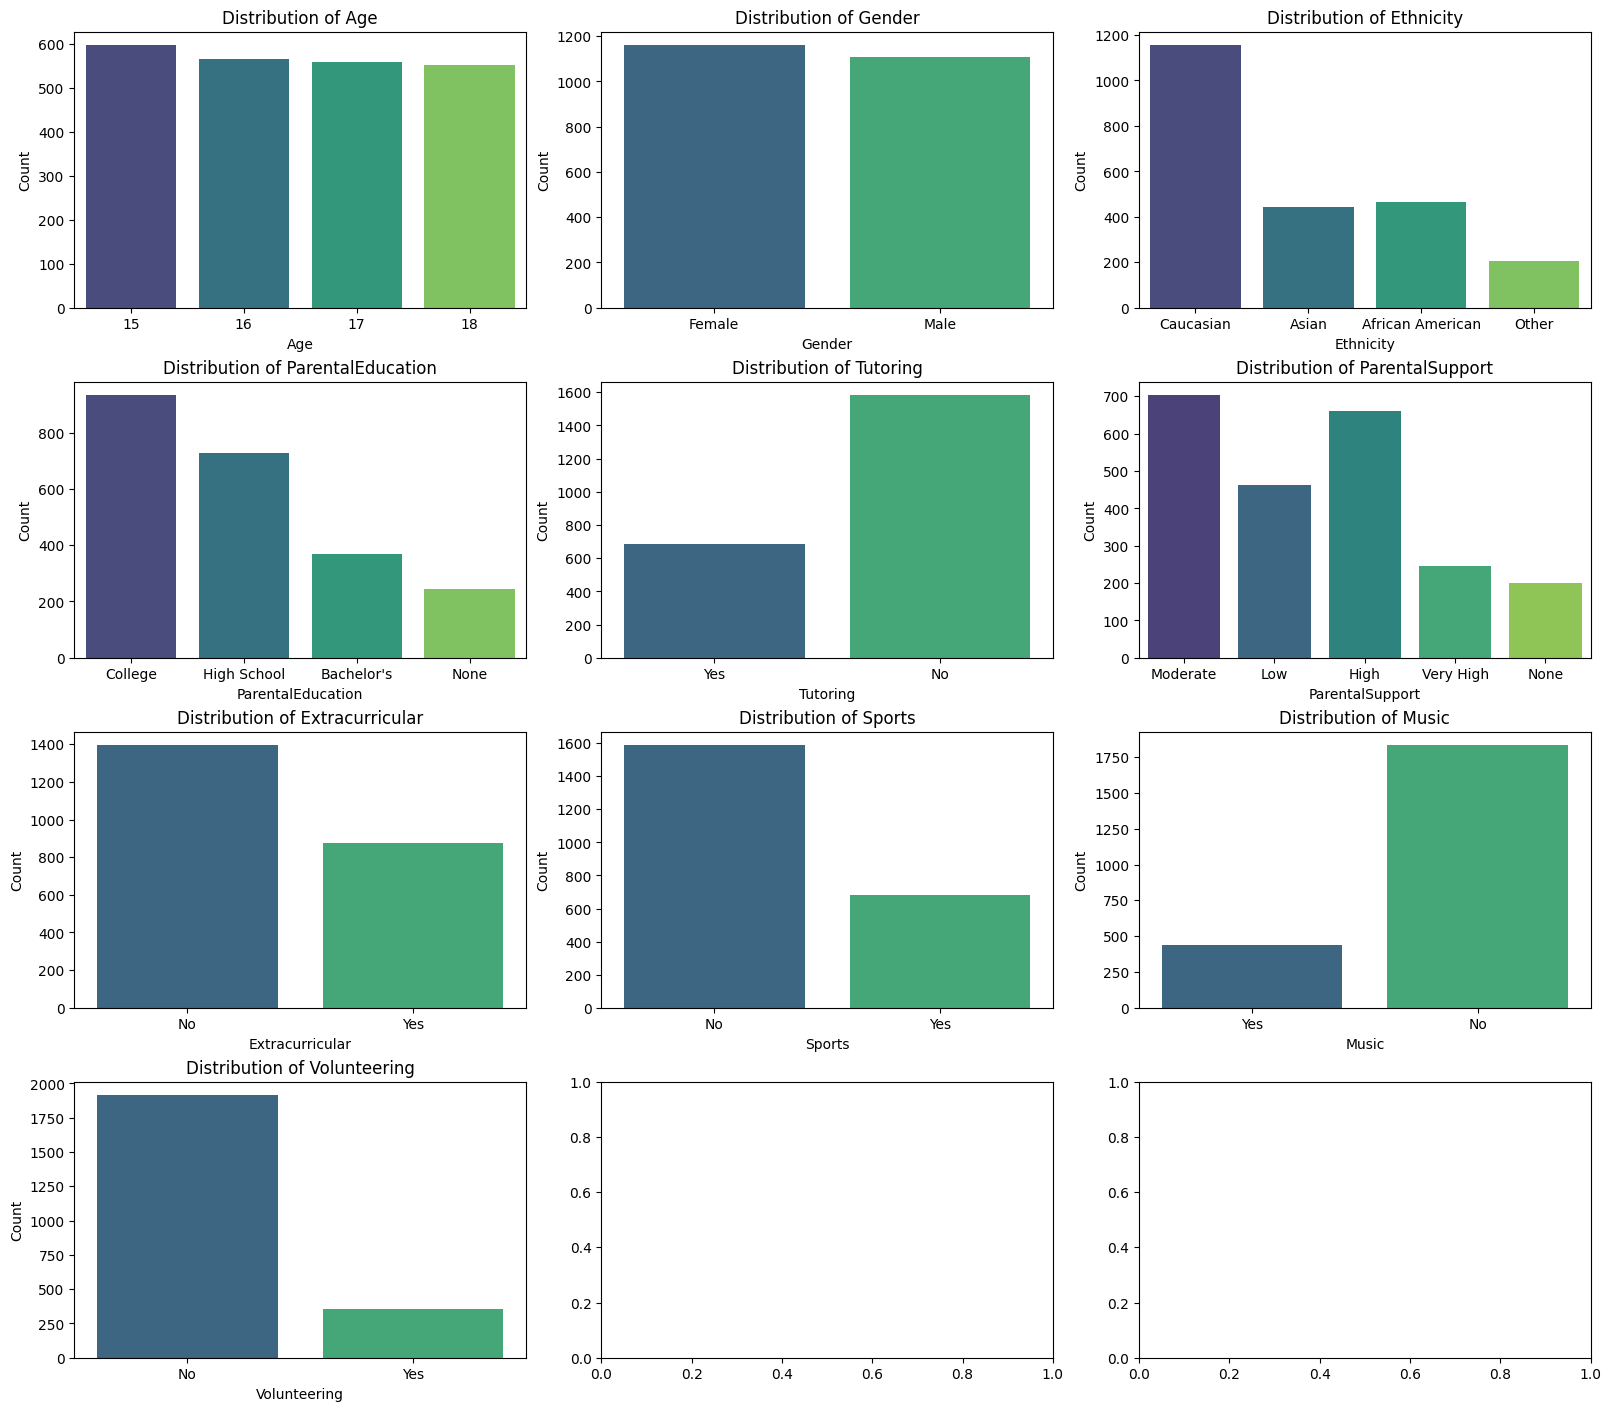

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 14), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(check_categoricals.columns.drop(['GPA'])):
    sns.countplot(data=check_categoricals, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

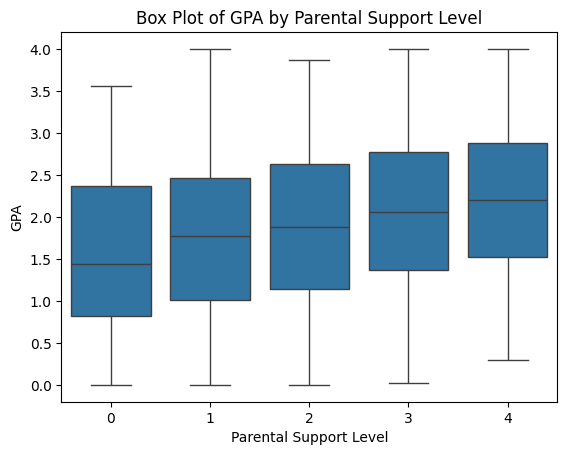

In [ ]:
sns.boxplot(data=new_df, x='ParentalSupport', y='GPA')

plt.xlabel('Parental Support Level')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Parental Support Level')
plt.show()

**The higher parental support indicates a higher average GPA**

In [ ]:
new_df['StudyTimeWeekly'] = np.ceil(new_df['StudyTimeWeekly'])

/tmp/ipython-input-3006040631.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
corr = new_df.corr()

<Axes: >

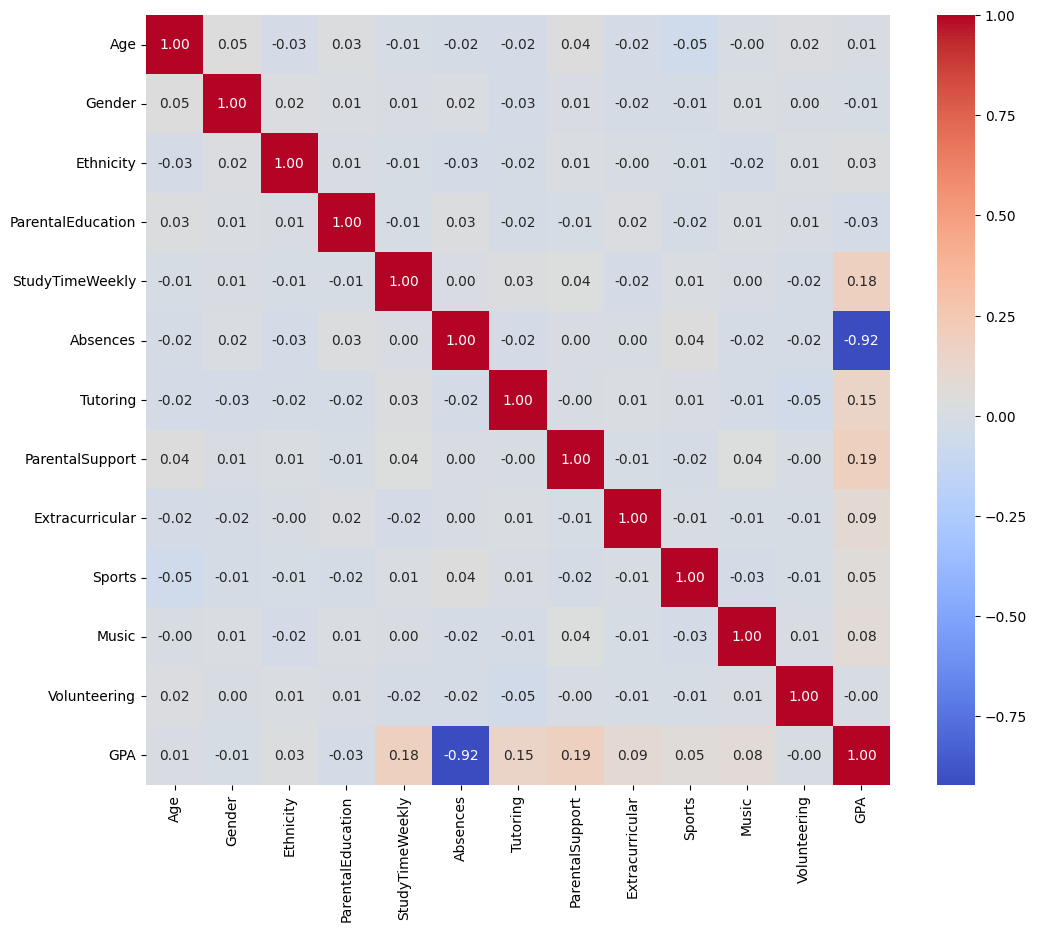

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

In [ ]:
new_df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,20.0,7,1,2,0,0,1,0,2.93
1,18,0,0,1,16.0,0,0,1,0,0,0,0,3.04
2,15,0,2,3,5.0,26,0,2,0,0,0,0,0.11
3,17,1,0,3,11.0,14,0,3,1,0,0,0,2.05
4,17,1,0,2,5.0,17,1,3,0,0,0,0,1.29


**Select the columns with weak correlation to drop them**

In [ ]:
# return the absloute value of the correlation to specify the weak columns
weak_corr = corr[abs(corr['GPA'])< 0.02].index
weak_corr

Index(['Age', 'Gender', 'Volunteering'], dtype='object')

In [ ]:
new_df = new_df.drop(weak_corr,axis=1)

In [ ]:
new_df

,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA
0,0,2,20.0,7,1,2,0,0,1,2.93
1,0,1,16.0,0,0,1,0,0,0,3.04
2,2,3,5.0,26,0,2,0,0,0,0.11
3,0,3,11.0,14,0,3,1,0,0,2.05
4,0,2,5.0,17,1,3,0,0,0,1.29
...,...,...,...,...,...,...,...,...,...,...
2387,0,3,11.0,2,0,4,1,0,0,3.46
2388,0,1,8.0,4,1,4,0,1,0,3.28
2389,0,2,7.0,20,0,2,0,0,0,1.14
2390,1,0,13.0,17,0,2,0,1,1,1.80


# **splitting the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
x = new_df.drop(['GPA'],axis=1)
y = new_df['GPA']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **Model**

In [ ]:
# We used LinearRegression because it gave us the best Result.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import pearsonr, spearmanr

In [ ]:
model= LinearRegression()

# **Training and testing results for the  algorithm using GPA:**

In [ ]:
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(f"\n LinearRegression:")
print(f"   R² Score - Training: {train_score:.2f}")
print(f"   R² Score - Test: {test_score:.2f}")


 LinearRegression:
   R² Score - Training: 0.95
   R² Score - Test: 0.95


# **evaluation**

In [ ]:
LnR = LinearRegression()
LnR.fit(x_train,y_train)

LinearRegression()

In [ ]:
LnR_predict = LnR.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test,LnR_predict)
print('the mean absolute error is',mae)
mse = mean_squared_error(y_test,LnR_predict)
print('mean squared error is',mse)
LnR_r2 = r2_score(y_test,LnR_predict)
print('the R2 score is',LnR_r2*100)
pearson_corr, pearson_p = pearsonr(y_test, LnR_predict)
print(f"Pearson Correlation: {pearson_corr:.4f}")
spearman_corr, spearman_p = spearmanr(y_test, LnR_predict)
print(f"Spearman Correlation: {spearman_corr:.4f}")

the mean absolute error is 0.1588607885849483
mean squared error is 0.03859663423820714
the R2 score is 95.44884905635692
Pearson Correlation: 0.9771
Spearman Correlation: 0.9789


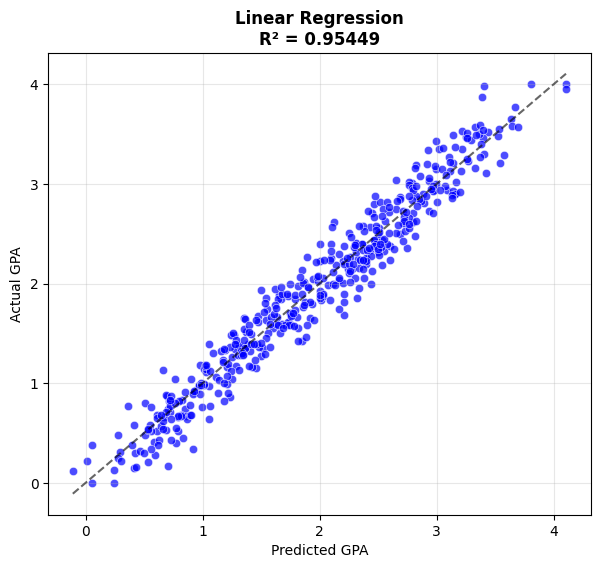

In [ ]:

# Create the figure
plt.figure(figsize=(7, 6))

# Scatter plot: Predicted vs Actual
sns.scatterplot(
    x=LnR_predict,
    y=y_test,
    color="blue",
    alpha=0.7
)

# Ideal diagonal line (Perfect prediction)
lims = [
    min(min(LnR_predict), min(y_test)),
    max(max(LnR_predict), max(y_test))
]
plt.plot(lims, lims, 'k--', alpha=0.6)

# R² score
r2 = r2_score(y_test, LnR_predict)

# Labels and title
plt.title(f"Linear Regression\nR² = {r2:.5f}", fontweight='bold')
plt.xlabel("Predicted GPA")
plt.ylabel("Actual GPA")
plt.grid(True, alpha=0.3)


plt.show()

## Project Summary

This coursework addresses the problem of predicting student Grade Point Average (GPA) based on various academic and demographic attributes. Understanding the factors that influence GPA is significant as it allows for the identification of potential academic challenges early, enabling targeted interventions and support systems to improve student outcomes. It also provides insights into the educational environment and socioeconomic factors impacting performance.

The machine learning method employed is **Linear Regression**, a supervised learning algorithm well-suited for predicting continuous target variables. The dataset underwent a rigorous preprocessing pipeline, which included the removal of 'StudentID' and 'GradeClass' columns, and the identification and removal of outliers in the 'ParentalEducation' feature using the Interquartile Range (IQR) method. Categorical variables were appropriately encoded, and feature selection was performed by dropping variables ('Age', 'Gender', 'Volunteering') with very weak correlations to GPA, as revealed by a correlation matrix analysis.

Key findings include a notable positive correlation between 'ParentalSupport' levels and student GPA, indicating that higher parental engagement or support tends to correspond with better academic performance. Furthermore, the final Linear Regression model demonstrated high predictive accuracy, achieving an R² score of 0.95 on both training and test datasets, a Mean Absolute Error of 0.16, and strong Pearson and Spearman correlations of approximately 0.98 between predicted and actual GPAs. These metrics underscore the model's robustness and the predictive power of the selected features.

In conclusion, this project successfully developed a highly accurate Linear Regression model capable of predicting student GPA. The analysis highlights the critical role of factors such as parental support, study time, and absences in influencing academic achievement, offering valuable insights for educational stakeholders to formulate effective strategies for student success.